In [647]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [648]:
def creategrid(size):
    grid = np.zeros((size, size, size))  
    print(grid.shape)
    return grid

In [649]:
def circle(radius, z_position, grid,voltage):
    if radius > grid[0].size:
        print("Radius of grid too big")
        return grid
    else:
        centerpoint = round(int(grid[2].shape[0])/ 2)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if(x - centerpoint)**2+(y-centerpoint)**2 <= radius**2:
                    grid[x,y,z_position] = voltage
    return grid

In [650]:
def drawgridslice(grid,zvalue,axis):
    match axis:
        case 'x':
            slice_z = grid[zvalue,:,:]
        case 'y':
            slice_z = grid[:,zvalue,:]
        case 'z':
            slice_z = grid[:,:,zvalue]
    centerpoint = round(int(grid[2].shape[0])/ 2)
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_z, cmap="viridis")  # 'viridis' is a color map; you can use others like 'hot', 'plasma', etc.
    plt.colorbar(label='Value')
    plt.title("2D Slice of 3D Grid at z="+str(zvalue))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.text(centerpoint, centerpoint, f'{grid[centerpoint,centerpoint,zvalue]:.2f}', color='white', ha='center', va='center',
             bbox=dict(facecolor='black', edgecolor='none', pad=1.5))
# Highlight the point with a marker
    plt.plot(centerpoint, centerpoint, 'ro')  # Red dot at the point (y, x)
    plt.show()

(100, 100, 100)


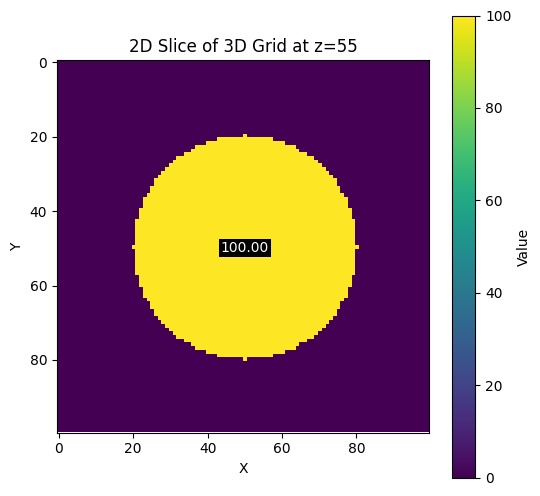

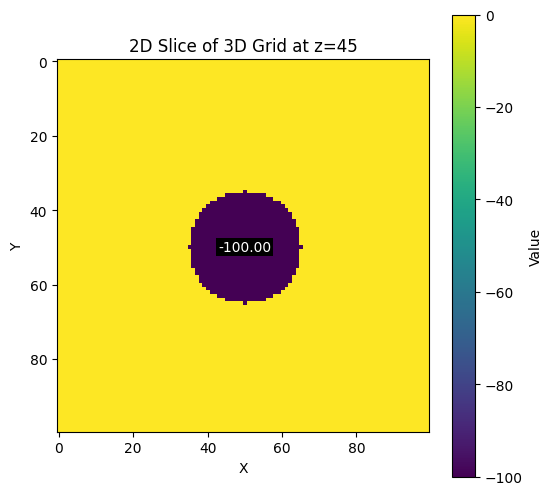

In [651]:
mygrid = creategrid(100)

mygrid = circle(30.0,55,mygrid,100.0) #circle #1
mygrid = circle(15.0,45,mygrid,-100.0) #circle #2

drawgridslice(mygrid,55,'z')
drawgridslice(mygrid,45,'z')

In [652]:
def draw3dgrid(grid):
    x,y,z = np.nonzero(grid)
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')
    # Labels and color bar
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.colorbar(scatter, ax=ax, label='Height (z-value)')
    
    plt.title("3D Plot of Non-zero Points in the Grid")
    plt.show()

def relaxationsolver(grid,iterations):
    gridboundaries = grid.copy()
    gridtemp = grid.copy()
    gridold = grid.copy()
    for l in tqdm(range(iterations)):
        incrementor = 1 #int((iterations-iterations/2)/((l+1)))
        for i in range(grid.shape[0]):
            for j in range(grid.shape[0]):
                for k in range(grid.shape[0]):
                    try:
                        gridtemp[i,j,k] =(gridold[i+incrementor,j,k]+gridold[i-incrementor,j,k]+gridold[i,j+incrementor,k]+gridold[i,j-incrementor,k]+gridold[i,j,k+incrementor]+gridold[i,j,k-incrementor])/6
                    except IndexError:
                        pass
        gridtemp = np.where(gridboundaries !=0, gridboundaries,gridtemp)
        gridold = gridtemp.copy()
    return gridtemp

In [653]:
sovledgrid = relaxationsolver(mygrid,100)


100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


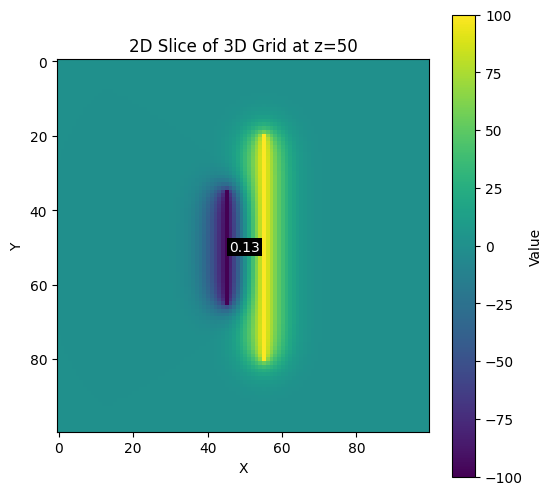

In [654]:
drawgridslice(sovledgrid,50,'x')


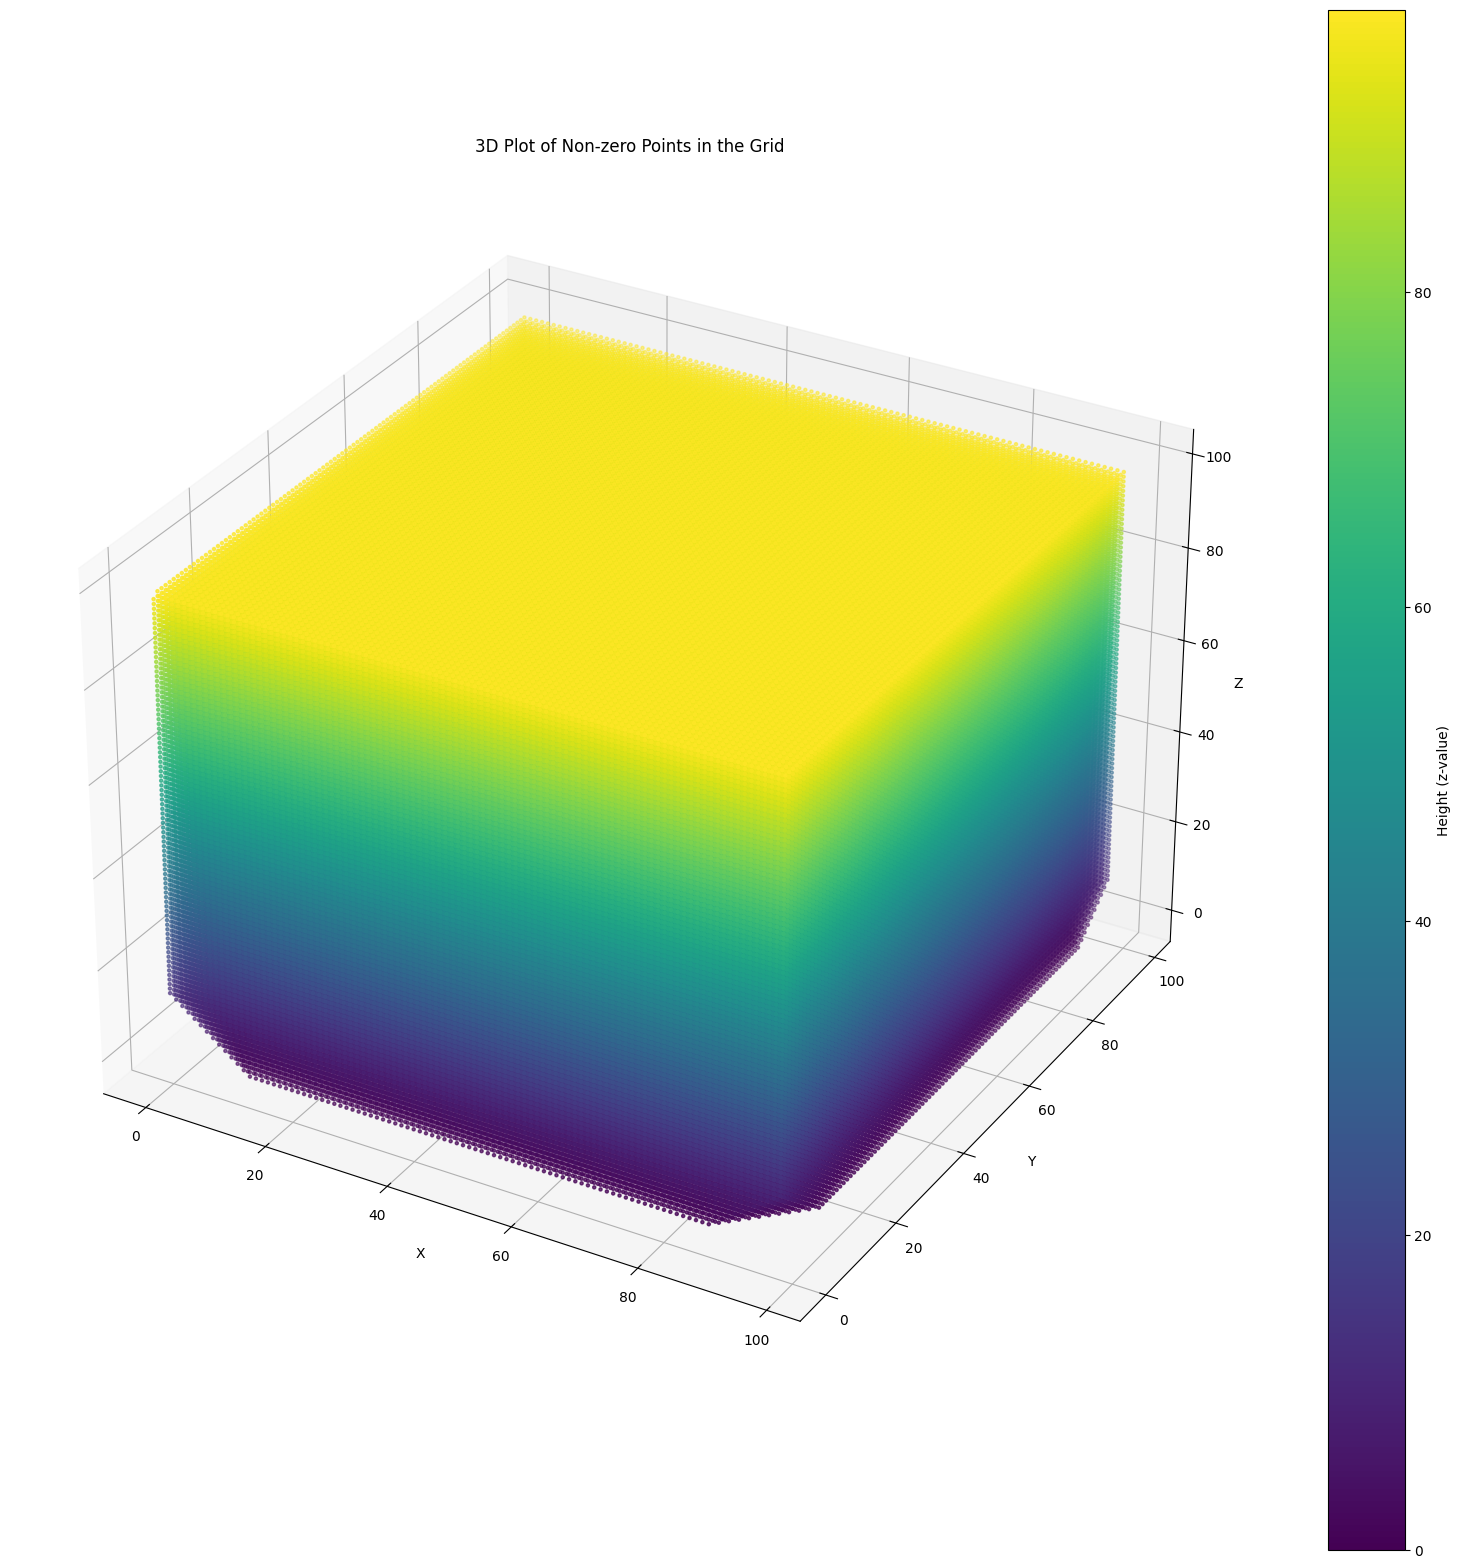

In [655]:
draw3dgrid(sovledgrid)

In [656]:
electric_field_x,electric_field_y,electric_field_z = np.gradient(-1*sovledgrid)
electric_field = np.stack((electric_field_x,electric_field_y,electric_field_z), axis = -1)

In [657]:
def drawgridslice_vector(xvalue,grad_y,grad_z):
    # Extract the gradients in the y and z directions at xvalue
    slice_grad_y = grad_y[xvalue, :, :]
    slice_grad_z = grad_z[xvalue, :, :]
    
    # Generate coordinate grids for the plot (y, z coordinates)
    y = np.arange(slice_grad_y.shape[0])  # Number of rows (y-direction)
    z = np.arange(slice_grad_y.shape[1])  # Number of columns (z-direction)
    Y, Z = np.meshgrid(y, z)
    # Keep every 5th point in each direction
    step = 5  # Keep every 5th point
    Y_sub = Y[::step, ::step]
    Z_sub = Z[::step, ::step]
    slice_grad_y_sub = slice_grad_y[::step, ::step]
    slice_grad_z_sub = slice_grad_z[::step, ::step]
    #log_arr_y = np.sign(slice_grad_y) * np.log(np.abs(slice_grad_y))
    #log_arr_z = np.sign(slice_grad_z) * np.log(np.abs(slice_grad_z))

    magnitude = np.sqrt(slice_grad_y**2 + slice_grad_z**2)    # Plot the quiver plot with larger arrows
    plt.figure(figsize=(40, 40))
    plt.quiver(Z, Y,slice_grad_y/magnitude,slice_grad_z/magnitude, magnitude,cmap = 'viridis',scale = 100)
    plt.colorbar(label='Magnitude')
    plt.xlabel("Y")
    plt.ylabel("Z")
    plt.show()

C:\Users\ierp9\AppData\Local\Temp\ipykernel_13876\4103322147.py:21: RuntimeWarning: invalid value encountered in divide
  plt.quiver(Z, Y,slice_grad_y/magnitude,slice_grad_z/magnitude, magnitude,cmap = 'viridis',scale = 100)


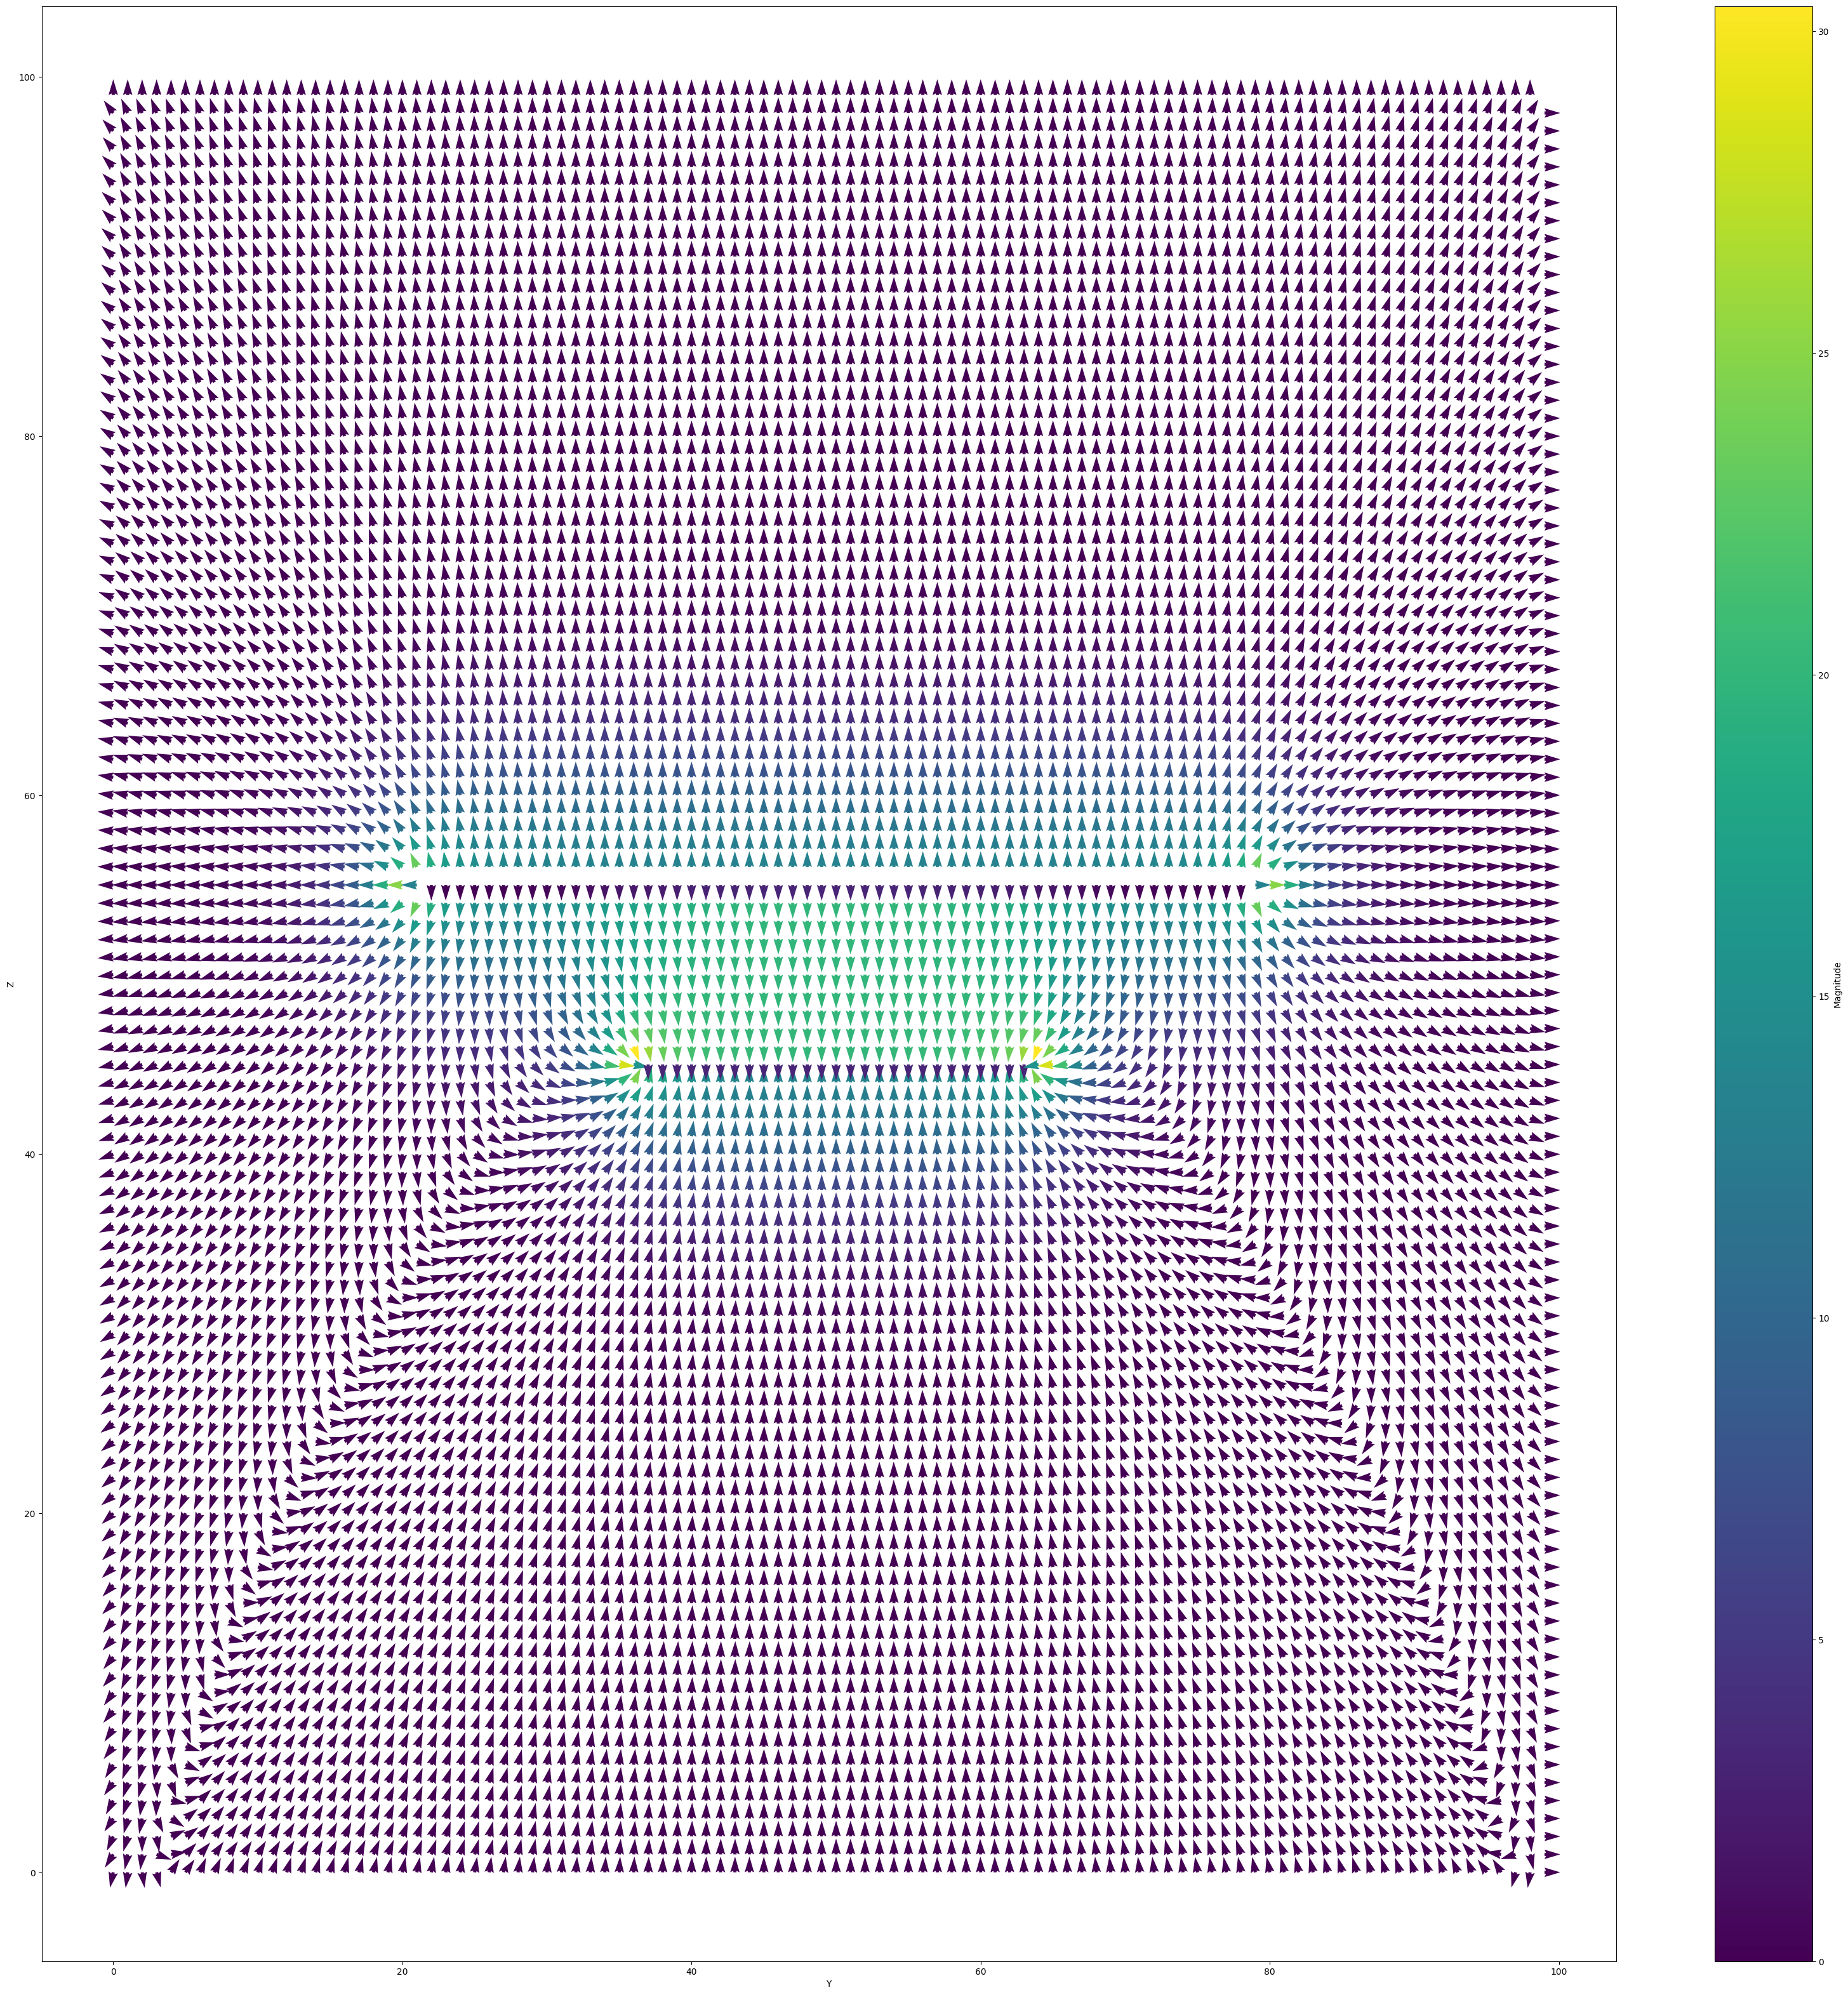

In [658]:
drawgridslice_vector(51,electric_field_y,electric_field_z)